In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from data.registry import mpg
from tensorflow.estimator import DNNRegressor
from models.utils import get_train_inputs
from utils import create_session_config
from flags import FLAGS
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline
import numpy as np
from experiment.experiment_vis import ExperimentVis
from experiment.utils import load_best_model_exps_all_data_sets,load_true_metrics_all_data_sets,results_all_experiments_comparison_t_paired,export_to_latext
import os
from bokeh.io import export_png
from collections import OrderedDict
import pandas as pd

/usr/local/lib/python3.5/dist-packages/nbconvert/exporters/exporter_locator.py:28: DeprecationWarning: `nbconvert.exporters.exporter_locator` is deprecated in favor of `nbconvert.exporters.base` since nbconvert 5.0.
  DeprecationWarning)
/home/pawel/tensorflow/lib/python3.5/site-packages/tornado/web.py:1747: DeprecationWarning: @asynchronous is deprecated, use coroutines instead
  DeprecationWarning)


In [18]:
FLAGS.data_set = "mpg"
data_loader = mpg()

loaded data: mpg.npz


Text(0.5,0,'x')

Text(0,0.5,'y')

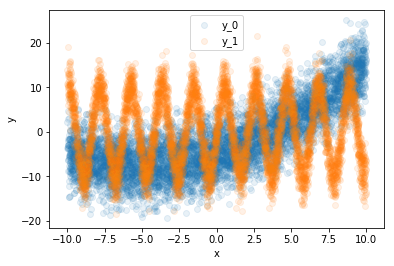

In [19]:
plt.scatter(data_loader.train_x, data_loader.train_y[:,0], alpha=0.1, label="y_0")
plt.scatter(data_loader.train_x, data_loader.train_y[:,1], alpha=0.1, label="y_1")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('')

In [15]:
np.corrcoef(data_loader.train_y.T)

array([[1.        , 0.15341038],
       [0.15341038, 1.        ]])

In [ ]:
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
data_loader = exp.data_loader
plt.figure(figsize=(16, 8));
# plt.title("sin")
# plt.xlabel("x")
# plt.ylabel('y')
plt.tight_layout()
plt.plot(data_loader.train_x, data_loader.train_y, '.');
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/inv_sin_normal_data.png', bbox_inches="tight")

INFO:tensorflow:Using config: {'_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fad02854940>, '_keep_checkpoint_max': 3, '_save_checkpoints_steps': 100, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.035
}
, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_device_fn': None, '_save_checkpoints_secs': None, '_master': '', '_protocol': None, '_train_distribute': None, '_log_step_count_steps': 1000, '_evaluation_master': '', '_eval_distribute': None, '_num_worker_replicas': 1, '_service': None, '_num_ps_replicas': 0, '_save_summary_steps': 50, '_is_chief': True, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_14_arch1_131_arch2_10_10_10_10_batch_size_6400_learning_rate_0.0016469415379458433_ts_2018-09-07_212058'}
loaded data: sin.npz
loaded data: sin.npz


<Figure size 1152x576 with 0 Axes>

Text(0.5,0,'x')

Text(0,0.5,'y')

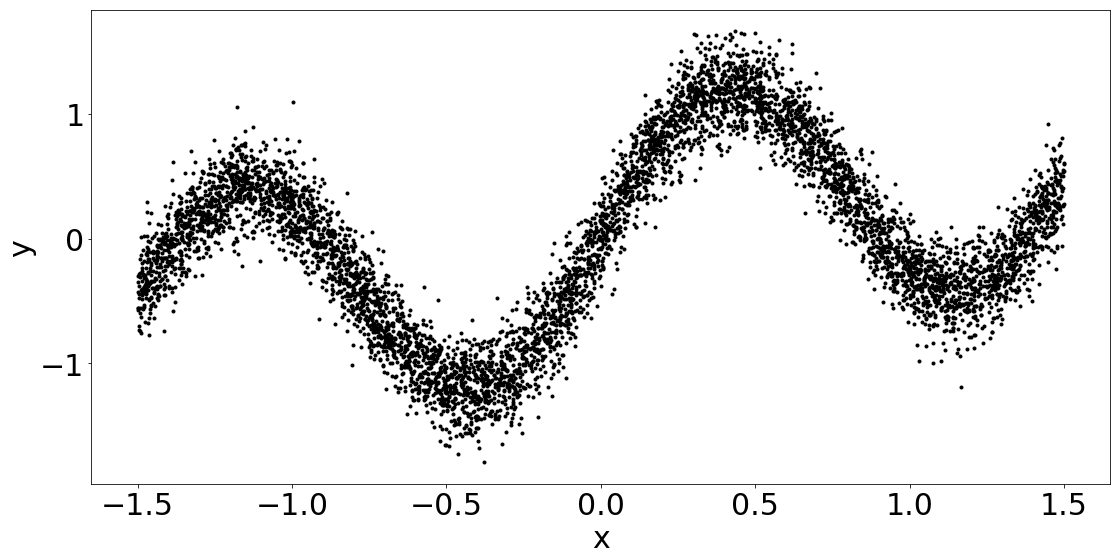

In [33]:
FLAGS.data_set = 'sin'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/all/sin/'
os.chdir(FLAGS.dir)

exp = ExperimentVis()
plt.rcParams['axes.labelsize'] = 30
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
data_loader = exp.data_loader
plt.figure(figsize=(16, 8));
plt.xlabel("x")
plt.ylabel('y')
plt.tight_layout()
plt.plot(data_loader.train_x, data_loader.train_y, '.',color="k");
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/sin_normal_data.png', bbox_inches="tight")

INFO:tensorflow:Using config: {'_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fad028e9978>, '_keep_checkpoint_max': 3, '_save_checkpoints_steps': 100, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.035
}
, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_device_fn': None, '_save_checkpoints_secs': None, '_master': '', '_protocol': None, '_train_distribute': None, '_log_step_count_steps': 1000, '_evaluation_master': '', '_eval_distribute': None, '_num_worker_replicas': 1, '_service': None, '_num_ps_replicas': 0, '_save_summary_steps': 50, '_is_chief': True, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_2_arch1_112_arch2_110_110_batch_size_6400_learning_rate_0.0007707362534461022_ts_2018-09-08_095105'}
loaded data: sin_t_noise.npz
loaded data: sin_t_noise.npz


<Figure size 1152x576 with 0 Axes>

Text(0.5,0,'x')

Text(0,0.5,'y')

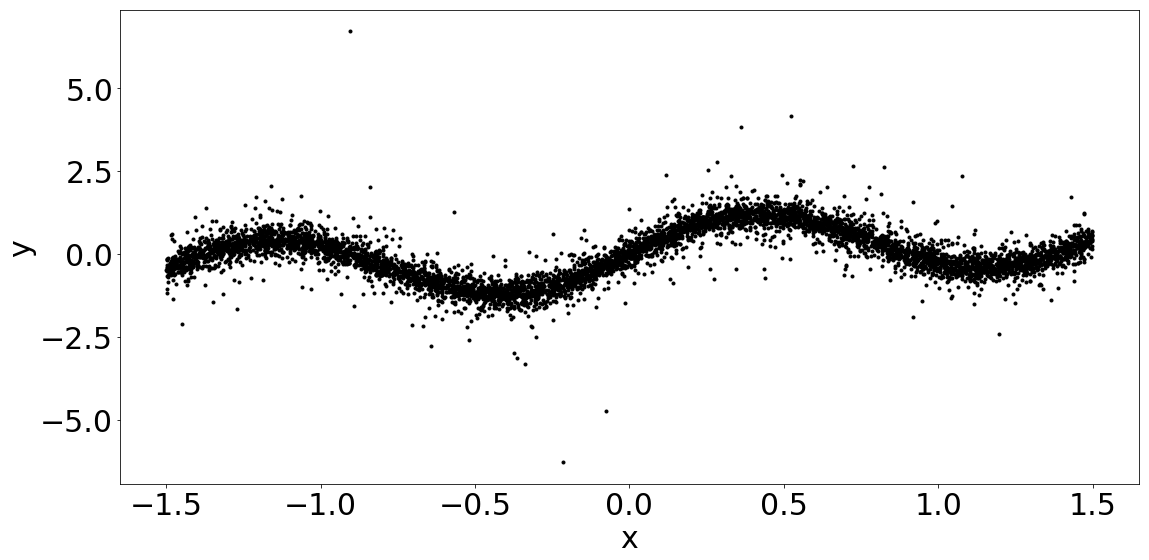

In [34]:
FLAGS.data_set = 'sin_t_noise'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/all/sin_t_noise/'
os.chdir(FLAGS.dir)

exp = ExperimentVis()

plt.rcParams['axes.labelsize'] = 30
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)  
data_loader = exp.data_loader
plt.figure(figsize=(16, 8));
plt.xlabel("x")
plt.ylabel('y')
plt.tight_layout()
plt.plot(data_loader.train_x, data_loader.train_y, '.',color="k");
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/sin_t_data.png', bbox_inches="tight")

INFO:tensorflow:Using config: {'_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fad028166a0>, '_keep_checkpoint_max': 3, '_save_checkpoints_steps': 100, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.035
}
, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_device_fn': None, '_save_checkpoints_secs': None, '_master': '', '_protocol': None, '_train_distribute': None, '_log_step_count_steps': 1000, '_evaluation_master': '', '_eval_distribute': None, '_num_worker_replicas': 1, '_service': None, '_num_ps_replicas': 0, '_save_summary_steps': 50, '_is_chief': True, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_17_arch1__arch2_126_126_batch_size_6400_learning_rate_0.00041305910809763844_ts_2018-09-08_110424'}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


<Figure size 1152x576 with 0 Axes>

Text(0.5,0,'x')

Text(0,0.5,'y')

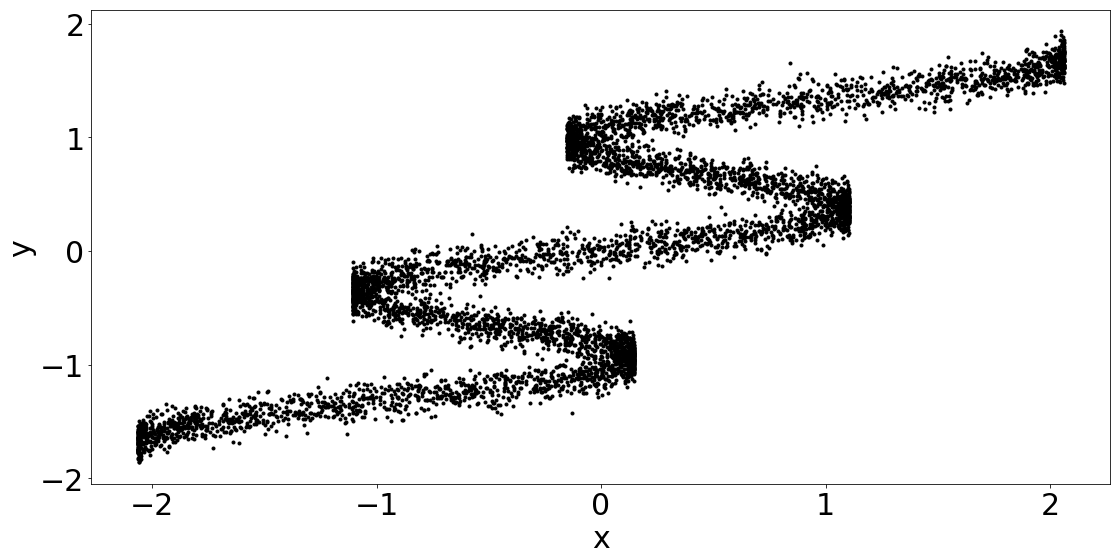

In [35]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/all/inv_sin/'
os.chdir(FLAGS.dir)

exp = ExperimentVis()

plt.rcParams['axes.labelsize'] = 30
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)  
data_loader = exp.data_loader
plt.figure(figsize=(16, 8));
plt.xlabel("x")
plt.ylabel('y')
plt.tight_layout()
plt.plot(data_loader.train_x, data_loader.train_y, '.',color="k");
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/inv_sin_normal_data.png', bbox_inches="tight")

INFO:tensorflow:Using config: {'_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fad026a4be0>, '_keep_checkpoint_max': 3, '_save_checkpoints_steps': 100, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.035
}
, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_device_fn': None, '_save_checkpoints_secs': None, '_master': '', '_protocol': None, '_train_distribute': None, '_log_step_count_steps': 1000, '_evaluation_master': '', '_eval_distribute': None, '_num_worker_replicas': 1, '_service': None, '_num_ps_replicas': 0, '_save_summary_steps': 50, '_is_chief': True, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_2_arch1_112_arch2_110_110_batch_size_6400_learning_rate_0.0007707362534461022_ts_2018-09-08_110721'}
loaded data: inv_sin_t_noise.npz
loaded data: inv_sin_t_noise.npz


<Figure size 1152x576 with 0 Axes>

Text(0.5,0,'x')

Text(0,0.5,'y')

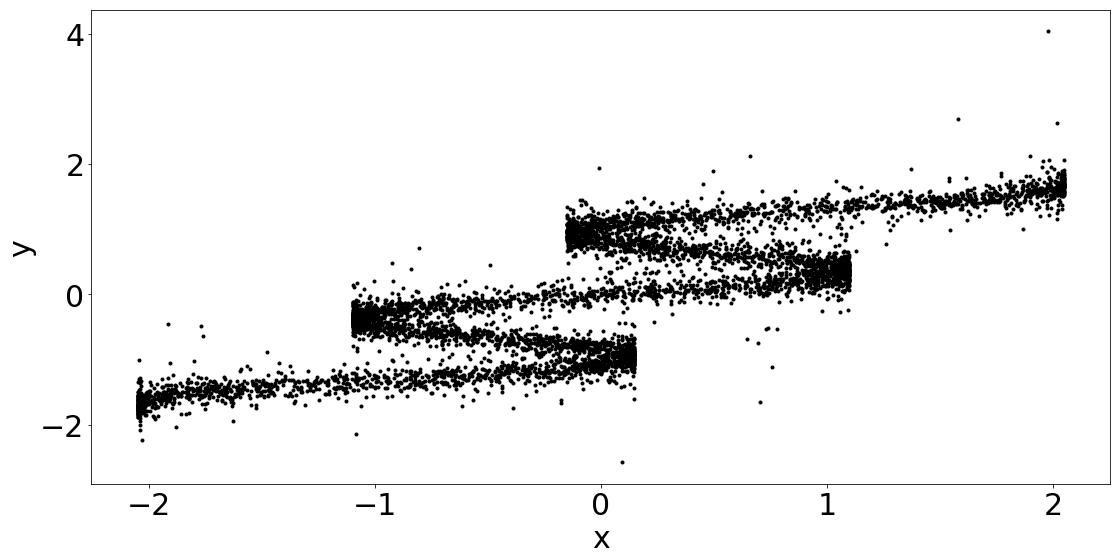

In [36]:
FLAGS.data_set = 'inv_sin_t_noise'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/all/inv_sin_t_noise/'
os.chdir(FLAGS.dir)

exp = ExperimentVis()

plt.rcParams['axes.labelsize'] = 30
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)  
data_loader = exp.data_loader
plt.figure(figsize=(16, 8));
plt.xlabel("x")
plt.ylabel('y')
plt.tight_layout()
plt.plot(data_loader.train_x, data_loader.train_y, '.',color="k");
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/inv_sin_t_data.png', bbox_inches="tight")

INFO:tensorflow:Using config: {'_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fad04217588>, '_keep_checkpoint_max': 3, '_save_checkpoints_steps': 100, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.035
}
, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_device_fn': None, '_save_checkpoints_secs': None, '_master': '', '_protocol': None, '_train_distribute': None, '_log_step_count_steps': 1000, '_evaluation_master': '', '_eval_distribute': None, '_num_worker_replicas': 1, '_service': None, '_num_ps_replicas': 0, '_save_summary_steps': 50, '_is_chief': True, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_15_arch1_113_113_113_arch2_89_batch_size_6400_learning_rate_0.00018904313900546863_ts_2018-09-08_183217'}
loaded data: mpg.npz
loaded data: mpg.npz


/home/pawel/PycharmProjects/RM/code/experiment/experiment_vis.py:33: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  self.data_loader.plot_data(show)


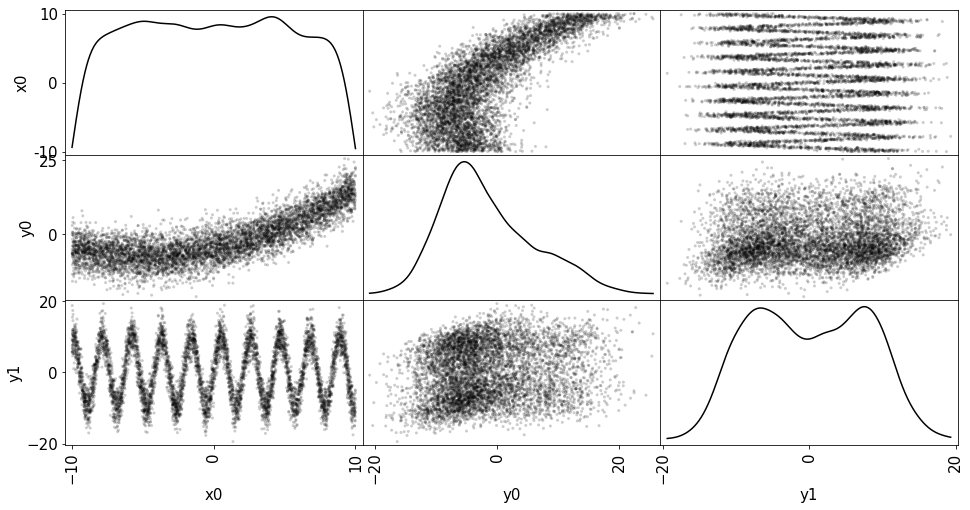

In [37]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/all/mpg/'
os.chdir(FLAGS.dir)
plt.rcParams['axes.labelsize'] = 15
exp = ExperimentVis()

axes=exp.plot_data(show=False)

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 15) for item in axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in axes.ravel()]

plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/generated_mv_nonlinear.png')
plt.show();

In [37]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'rnade_normal'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/inv_sin/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None],y_fixed=[None])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/rnade_normal_inv_sin_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_normal/id_3_hidden_units_172_k_mix_32_batch_size_200_learning_rate_0.0011196861833252308_ts_2018-09-25_103927', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc991cda0>, '_task_type': 'worker', '_task_id': 0}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_normal/id_3_hidden_units_172_k_mix_32_batch_size_200_learning_rate_0.0011196861833252308_ts_2018-09-25_103927/model.ckpt-8501
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.262622


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 37300), raddr=('127.0.0.1', 48045)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 37302), raddr=('127.0.0.1', 48045)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 37304), raddr=('127.0.0.1', 48045)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/rnade_normal_inv_sin_heatmap.png'

In [38]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'rnade_laplace'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/inv_sin/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None],y_fixed=[None])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/rnade_laplace_inv_sin_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_laplace/id_7_hidden_units_164_k_mix_10_batch_size_200_learning_rate_0.0010871891208050696_ts_2018-09-25_103818', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc8edb8d0>, '_task_type': 'worker', '_task_id': 0}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_laplace/id_7_hidden_units_164_k_mix_10_batch_size_200_learning_rate_0.0010871891208050696_ts_2018-09-25_103818/model.ckpt-7101
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.261101


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 47842), raddr=('127.0.0.1', 60843)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 47844), raddr=('127.0.0.1', 60843)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 47846), raddr=('127.0.0.1', 60843)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/rnade_laplace_inv_sin_heatmap.png'

In [39]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'rnade_deepnormal'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/inv_sin/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None],y_fixed=[None])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/rnade_deep_normal_inv_sin_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_deepnormal/id_38_arch_80_80_80_80_80_k_mix_53_batch_size_200_learning_rate_0.0017689914013888893_num_ensambles_1_ts_2018-10-01_164248', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc91b6668>, '_task_type': 'worker', '_task_id': 0}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_deepnormal/id_38_arch_80_80_80_80_80_k_mix_53_batch_size_200_learning_rate_0.0017689914013888893_num_ensambles_1_ts_2018-10-01_164248/model.ckpt-23001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.261869


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 46430), raddr=('127.0.0.1', 55709)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 46432), raddr=('127.0.0.1', 55709)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 46434), raddr=('127.0.0.1', 55709)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/rnade_deep_normal_inv_sin_heatmap.png'

In [40]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'rnade_deeplaplace'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/inv_sin/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None],y_fixed=[None])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/rnade_deep_laplace_inv_sin_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_deeplaplace/id_11_arch_127_127_127_k_mix_96_batch_size_200_learning_rate_0.00028975493698947644_num_ensambles_2_ts_2018-10-01_134239', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc91b6ac8>, '_task_type': 'worker', '_task_id': 0}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_deeplaplace/id_11_arch_127_127_127_k_mix_96_batch_size_200_learning_rate_0.00028975493698947644_num_ensambles_2_ts_2018-10-01_134239/model.ckpt-59001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.261421


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 49444), raddr=('127.0.0.1', 41939)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 49446), raddr=('127.0.0.1', 41939)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 49448), raddr=('127.0.0.1', 41939)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/rnade_deep_laplace_inv_sin_heatmap.png'

In [2]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'mdn_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/inv_sin/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None],y_fixed=[None])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mdn_inv_sin_heatmap.png")

INFO:tensorflow:Using config: {'_model_dir': 'tensorboard/mdn_const_cov/id_9_num_layers_5_hidden_units_94_k_mix_4_batch_size_200_learning_rate_0.0017703534145539599_ts_2018-10-04_130645', '_tf_random_seed': None, '_evaluation_master': '', '_keep_checkpoint_max': 3, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_save_checkpoints_secs': None, '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_save_summary_steps': 500, '_log_step_count_steps': 1000, '_service': None, '_task_type': 'worker', '_device_fn': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_train_distribute': None, '_protocol': None, '_master': '', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6a95494f60>, '_eval_distribute': None}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/mdn_const_cov/id_9_num_layers_5_hidden_units_94_k_mix_4_batch_size_200_learning_rate_0.0017703534145539599_ts_2018-10-04_130645/model.ckpt-31001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.261895


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 40028), raddr=('127.0.0.1', 38251)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 40030), raddr=('127.0.0.1', 38251)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 40032), raddr=('127.0.0.1', 38251)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mdn_inv_sin_heatmap.png'

In [42]:
FLAGS.data_set = 'inv_sin'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/inv_sin/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None],y_fixed=[None])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/monde_inv_sin_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_45_arch1_10_10_10_arch2_10_batch_size_200_learning_rate_0.01_ts_2018-09-25_110242', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9062208>, '_task_type': 'worker', '_task_id': 0}
loaded data: inv_sin.npz
loaded data: inv_sin.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_const_cov/id_45_arch1_10_10_10_arch2_10_batch_size_200_learning_rate_0.01_ts_2018-09-25_110242/model.ckpt-5001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.261637


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 57484), raddr=('127.0.0.1', 41737)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 57486), raddr=('127.0.0.1', 41737)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 57488), raddr=('127.0.0.1', 41737)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/monde_inv_sin_heatmap.png'

In [4]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'rnade_normal'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_real(paper=True,x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_true_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_normal/id_10_hidden_units_127_k_mix_67_batch_size_200_learning_rate_0.0006661557147664367_ts_2018-09-24_220642', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9c74668>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

integral: 0.000670


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 43538), raddr=('127.0.0.1', 57597)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 43540), raddr=('127.0.0.1', 57597)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 43542), raddr=('127.0.0.1', 57597)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_true_heatmap.png'

In [5]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'rnade_normal'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True,x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_normal_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_normal/id_10_hidden_units_127_k_mix_67_batch_size_200_learning_rate_0.0006661557147664367_ts_2018-09-24_220642', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9bd1eb8>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_normal/id_10_hidden_units_127_k_mix_67_batch_size_200_learning_rate_0.0006661557147664367_ts_2018-09-24_220642/model.ckpt-19301
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000683


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 55154), raddr=('127.0.0.1', 41499)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 55156), raddr=('127.0.0.1', 41499)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 55158), raddr=('127.0.0.1', 41499)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_normal_heatmap.png'

In [6]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'rnade_laplace'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_laplace_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_laplace/id_24_hidden_units_79_k_mix_85_batch_size_200_learning_rate_0.004788371126873331_ts_2018-09-24_221726', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9beeda0>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_laplace/id_24_hidden_units_79_k_mix_85_batch_size_200_learning_rate_0.004788371126873331_ts_2018-09-24_221726/model.ckpt-4501
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000636


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 42344), raddr=('127.0.0.1', 55123)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 42346), raddr=('127.0.0.1', 55123)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 42348), raddr=('127.0.0.1', 55123)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_laplace_heatmap.png'

In [10]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'rnade_deepnormal'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_deep_normal_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_deepnormal/id_10_arch_184_k_mix_91_batch_size_200_learning_rate_0.001474953203494469_num_ensambles_2_ts_2018-10-01_165445', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9b55cc0>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_deepnormal/id_10_arch_184_k_mix_91_batch_size_200_learning_rate_0.001474953203494469_num_ensambles_2_ts_2018-10-01_165445/model.ckpt-110005
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000634


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 57378), raddr=('127.0.0.1', 50953)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 57380), raddr=('127.0.0.1', 50953)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 57382), raddr=('127.0.0.1', 50953)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_deep_normal_heatmap.png'

In [11]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'rnade_deeplaplace'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_deep_laplace_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/rnade_deeplaplace/id_42_arch_200_200_200_200_k_mix_7_batch_size_200_learning_rate_0.0015764194950834936_num_ensambles_5_ts_2018-10-01_203545', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9b789b0>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_deeplaplace/id_42_arch_200_200_200_200_k_mix_7_batch_size_200_learning_rate_0.0015764194950834936_num_ensambles_5_ts_2018-10-01_203545/model.ckpt-32001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000584


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 41468), raddr=('127.0.0.1', 57433)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 41470), raddr=('127.0.0.1', 57433)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 41472), raddr=('127.0.0.1', 57433)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_rnade_deep_laplace_heatmap.png'

In [12]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'mdn_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_mdn_const_cov_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/mdn_const_cov/id_19_num_layers_4_hidden_units_128_k_mix_4_batch_size_200_learning_rate_0.0028470964314277545_ts_2018-09-25_003841', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9b09d30>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/mdn_const_cov/id_19_num_layers_4_hidden_units_128_k_mix_4_batch_size_200_learning_rate_0.0028470964314277545_ts_2018-09-25_003841/model.ckpt-9901
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000650


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 48050), raddr=('127.0.0.1', 50613)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 48052), raddr=('127.0.0.1', 50613)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 48054), raddr=('127.0.0.1', 50613)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_mdn_const_cov_heatmap.png'

In [13]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'mdn_param_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_mdn_param_cov_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/mdn_param_cov/id_24_num_layers_6_hidden_units_92_k_mix_6_batch_size_200_learning_rate_0.007141649561078812_ts_2018-09-25_112012', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9b806d8>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/mdn_param_cov/id_24_num_layers_6_hidden_units_92_k_mix_6_batch_size_200_learning_rate_0.007141649561078812_ts_2018-09-25_112012/model.ckpt-6401
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000773


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 58614), raddr=('127.0.0.1', 57149)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 58616), raddr=('127.0.0.1', 57149)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 58618), raddr=('127.0.0.1', 57149)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_mdn_param_cov_heatmap.png'

In [14]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'nn_pdf_ar'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_ar_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/nn_pdf_ar/id_25_arch1_156_156_156_arch2_102_102_102_102_102_batch_size_200_learning_rate_0.0006912753697901009_ts_2018-09-24_225803', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9b1e128>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_ar/id_25_arch1_156_156_156_arch2_102_102_102_102_102_batch_size_200_learning_rate_0.0006912753697901009_ts_2018-09-24_225803/model.ckpt-6701
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000673


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 54816), raddr=('127.0.0.1', 53689)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 54818), raddr=('127.0.0.1', 53689)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 54820), raddr=('127.0.0.1', 53689)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_ar_heatmap.png'

In [15]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'nn_pdf_const_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_const_cov_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/nn_pdf_const_cov/id_26_arch1_178_178_178_arch2_81_81_batch_size_200_learning_rate_0.0005371887344532019_ts_2018-09-24_230857', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9ad9828>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_const_cov/id_26_arch1_178_178_178_arch2_81_81_batch_size_200_learning_rate_0.0005371887344532019_ts_2018-09-24_230857/model.ckpt-4501
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000694


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 46582), raddr=('127.0.0.1', 41403)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 46584), raddr=('127.0.0.1', 41403)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 46586), raddr=('127.0.0.1', 41403)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_const_cov_heatmap.png'

In [16]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'nn_pdf_param_cov'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_param_cov_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/nn_pdf_param_cov/id_43_arch1_127_127_127_arch2_33_33_33_33_arch_cov_200_200_200_batch_size_200_learning_rate_0.0008585439651772087_ts_2018-09-25_120911', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9b1e748>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_param_cov/id_43_arch1_127_127_127_arch2_33_33_33_33_arch_cov_200_200_200_batch_size_200_learning_rate_0.0008585439651772087_ts_2018-09-25_120911/model.ckpt-5201
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000687


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 53006), raddr=('127.0.0.1', 54741)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 53008), raddr=('127.0.0.1', 54741)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 53010), raddr=('127.0.0.1', 54741)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_param_cov_heatmap.png'

In [17]:
FLAGS.data_set = 'mpg'
FLAGS.model = 'nn_pdf_m'
FLAGS.plot=True
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp5/mpg/'
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
p=exp.show_pdf_heatmap_model(paper=True, x_fixed=[None], y_fixed=[None,0])
export_png(p, filename="/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_m_heatmap.png")

INFO:tensorflow:Using config: {'_train_distribute': None, '_save_checkpoints_steps': 1000, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_eval_distribute': None, '_master': '', '_keep_checkpoint_max': 3, '_save_summary_steps': 500, '_device_fn': None, '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': None, '_log_step_count_steps': 1000, '_tf_random_seed': None, '_model_dir': 'tensorboard/nn_pdf_m/id_1_arch1_86_86_86_arch2_57_57_arch3_31_31_batch_size_200_learning_rate_0.00046746170289107376_ts_2018-10-03_161410', '_protocol': None, '_global_id_in_cluster': 0, '_evaluation_master': '', '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcfc9f0f198>, '_task_type': 'worker', '_task_id': 0}
loaded data: mpg.npz
loaded data: mpg.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_m/id_1_arch1_86_86_86_arch2_57_57_arch3_31_31_batch_size_200_learning_rate_0.00046746170289107376_ts_2018-10-03_161410/model.ckpt-22001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
integral: 0.000679


/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 48256), raddr=('127.0.0.1', 50347)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 48258), raddr=('127.0.0.1', 50347)>
  return self._request(command_info[0], url, body=data)
/home/pawel/tensorflow/lib/python3.5/site-packages/selenium/webdriver/remote/remote_connection.py:376: ResourceWarning: unclosed <socket.socket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 48260), raddr=('127.0.0.1', 50347)>
  return self._request(command_info[0], url, body=data)
/home/p

'/home/pawel/PycharmProjects/RM/paper/figures/mv_nonlinear_nn_pdf_m_heatmap.png'

In [45]:
from data.registry import create_data_loader

FLAGS.data_sets = """sin,sin_t_noise,inv_sin,inv_sin_t_noise,uci_redwine,uci_redwine_joint,uci_whitewine,uci_parkinsons,mpg,uci_whitewine_joint,uci_parkinsons_joint,etf,etf2d,fx_all_predicted,fx_eurgbp_predicted,fx_eur_predicted"""
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/'

data_sets = OrderedDict()
for ds in FLAGS.data_sets.split(","):
    FLAGS.data_set=ds
    os.chdir(os.path.join(FLAGS.dir,ds))
    data_sets[ds]=create_data_loader()

data_sets_meta = pd.DataFrame(columns=["data set", "observations", "x dimension", "y dimension"])
for name, ds in data_sets.items():
    data_sets_meta.loc[len(data_sets_meta)] = [name, ds.data.shape[0], ds.train_x.shape[1], ds.train_y.shape[1]]

data_sets_meta.set_index('data set', inplace=True)
data_sets_meta.rename(index={'sin': 'sin normal',
                             'sin_t_noise': 'sin t',
                             'inv_sin': 'inv sin normal',
                             'inv_sin_t_noise': 'inv sin t',
                             'etf': 'etf 1d',
                             'etf2d': 'etf 2d',
                             'uci_redwine': 'uci redwine 2d',
                             'uci_whitewine': 'uci whitewine 2d',
                             'uci_parkinsons': 'uci parkinsons 2d',
                             'mpg': 'mv nonlinear',
                             'uci_redwine_joint': 'uci redwine unsupervised',
                             'uci_whitewine_joint': 'uci whitewine unsupervised',
                             'uci_parkinsons_joint': 'uci parkinsons unsupervised',
                             'fx_all_predicted': 'FX all assets predicted',
                             'fx_eurgbp_predicted': 'FX EUR and GBP predicted',
                             'fx_eur_predicted': 'FX EUR predicted'}, inplace=True)
data_sets_meta
data_sets_meta.to_latex('/home/pawel/PycharmProjects/RM/paper/tables/data_sets_meta.tex')

loaded data: sin.npz
loaded data: sin_t_noise.npz
loaded data: inv_sin.npz
loaded data: inv_sin_t_noise.npz
loaded data: uci_redwine.npz
loaded data: uci_redwine_joint.npz
loaded data: uci_whitewine.npz
loaded data: uci_parkinsons.npz
loaded data: mpg.npz
loaded data: uci_whitewine_joint.npz
loaded data: uci_parkinsons_joint.npz
loaded data: etf.npz
loaded data: etf2d.npz
loaded data: fx_all_predicted.npz
loaded data: fx_eurgbp_predicted.npz
loaded data: fx_eur_predicted.npz


,observations,x dimension,y dimension
data set,,,
sin normal,10000,1,1
sin t,10000,1,1
inv sin normal,10000,1,1
inv sin t,10000,1,1
uci redwine 2d,1599,7,2
uci redwine unsupervised,1599,0,9
uci whitewine 2d,4898,1,2
uci parkinsons 2d,5875,13,2
mv nonlinear,10000,1,2


In [46]:
FLAGS.data_sets = 'sin,sin_t_noise,inv_sin,inv_sin_t_noise,uci_redwine,uci_redwine_joint,uci_whitewine,uci_parkinsons,mpg,uci_whitewine_joint,uci_parkinsons_joint,etf,etf2d,fx_all_predicted,fx_eurgbp_predicted,fx_eur_predicted'
FLAGS.models = 'rnade_laplace,rnade_normal,rnade_deepnormal,rnade_deeplaplace,nn_pdf_const_cov,nn_pdf_param_cov,nn_pdf_ar,nn_pdf_m,mdn_const_cov,mdn_param_cov'
FLAGS.plot=False
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/tmp2/'

os.chdir(FLAGS.dir)

experiments = load_best_model_exps_all_data_sets()
true_metrics=load_true_metrics_all_data_sets()

eval_name = 'best_model_test_ll'

results = results_all_experiments_comparison_t_paired(true_metrics, experiments, eval_name)

os.chdir('/home/pawel/PycharmProjects/RM/paper/')

export_to_latext(experiments,results.filter(items=['sin','sin_t_noise','inv_sin','inv_sin_t_noise','mpg'], axis=0), {'rnade_laplace':'RNADE\\\\Laplace',
                                         'rnade_normal':'RNADE\\\\Normal',
                                          'rnade_deepnormal':'RNADE\\\\Deep\\\\Normal',
                                        'rnade_deeplaplace':'RNADE\\\\Deep\\\\Laplace',                                                               
                                        'nn_pdf_const_cov':'MONDE\\\\Const\\\\Cov',
                                        'nn_pdf_param_cov':'MONDE\\\\Param\\\\Cov',
                                        'nn_pdf_ar':'MONDE\\\\AR',
                                        'nn_pdf_m':'PUMONDE',
                                        'mdn_const_cov':'MDN\\\\Const\\\\Cov',
                                        'mdn_param_cov':'MDN\\\\Param\\\\Cov',
                          'true':'True\\\\LL'},
                 {'sin': 'sin normal','sin_t_noise':'sin t','inv_sin':'inv sin normal',
                 'inv_sin_t_noise':'inv sin t','mpg':'mv nonlinear'},'tables/generated_ll.tex')

export_to_latext(experiments,results.filter(items=['uci_redwine','uci_redwine_joint','uci_whitewine','uci_parkinsons','uci_parkinsons_joint'], axis=0).drop(columns=["true"]), {'rnade_laplace':'RNADE\\\\Laplace',
                                         'rnade_normal':'RNADE\\\\Normal',
                                          'rnade_deepnormal':'RNADE\\\\Deep\\\\Normal',
                                        'rnade_deeplaplace':'RNADE\\\\Deep\\\\Laplace',  
                                        'nn_pdf_const_cov':'MONDE\\\\Const\\\\Cov',
                                        'nn_pdf_param_cov':'MONDE\\\\Param\\\\Cov',
                                        'nn_pdf_ar':'MONDE\\\\AR',
                                        'nn_pdf_m':'PUMONDE',
                                        'mdn_const_cov':'MDN\\\\Const\\\\Cov',
                                        'mdn_param_cov':'MDN\\\\Param\\\\Cov'},
                 {'uci_redwine': 'uci redwine 2d','uci_redwine_joint':'uci redwine\\\\unsupervised',
                  'uci_whitewine':'uci whitewine 2d',
                  'uci_whitewine_joint':'uci whitewine\\\\unsupervised',
                  'uci_parkinsons':'uci parkinsons 2d',
                  'uci_parkinsons_joint':'uci parkinsons\\\\unsupervised'},'tables/uci_ll.tex')

export_to_latext(experiments,results.filter(items=['etf','etf2d','fx_eur_predicted','fx_eurgbp_predicted','fx_all_predicted'], axis=0).drop(columns=["true"]), {'rnade_laplace':'RNADE\\\\Laplace',
                                         'rnade_normal':'RNADE\\\\Normal',
                                         'rnade_deepnormal':'RNADE\\\\Deep\\\\Normal',
                                        'rnade_deeplaplace':'RNADE\\\\Deep\\\\Laplace',  
                                        'nn_pdf_const_cov':'MONDE\\\\Const\\\\Cov',
                                        'nn_pdf_param_cov':'MONDE\\\\Param\\\\Cov',
                                        'nn_pdf_ar':'MONDE\\\\AR',
                                        'nn_pdf_m':'PUMONDE',
                                        'mdn_const_cov':'MDN\\\\Const\\\\Cov',
                                        'mdn_param_cov':'MDN\\\\Param\\\\Cov'},
                 {'etf': 'etf 1d','etf2d':'etf 2d',
                  'fx_eur_predicted':'FX EUR predicted',
                    'fx_eurgbp_predicted':'FX EUR GBP predicted',
                    'fx_all_predicted':'FX ALL predicted',
                  },'tables/fin_ll.tex')

Experiment: nn_pdf_param_cov in dir: sin not found
Experiment: nn_pdf_ar in dir: sin not found
Experiment: nn_pdf_m in dir: sin not found
Experiment: mdn_param_cov in dir: sin not found
Experiment: nn_pdf_param_cov in dir: sin_t_noise not found
Experiment: nn_pdf_ar in dir: sin_t_noise not found
Experiment: nn_pdf_m in dir: sin_t_noise not found
Experiment: mdn_param_cov in dir: sin_t_noise not found
Experiment: nn_pdf_param_cov in dir: inv_sin not found
Experiment: nn_pdf_ar in dir: inv_sin not found
Experiment: nn_pdf_m in dir: inv_sin not found
Experiment: mdn_param_cov in dir: inv_sin not found
Experiment: nn_pdf_param_cov in dir: inv_sin_t_noise not found
Experiment: nn_pdf_ar in dir: inv_sin_t_noise not found
Experiment: nn_pdf_m in dir: inv_sin_t_noise not found
Experiment: mdn_param_cov in dir: inv_sin_t_noise not found
Experiment: nn_pdf_m in dir: uci_redwine_joint not found
Experiment: nn_pdf_m in dir: uci_whitewine_joint not found
Experiment: nn_pdf_m in dir: uci_parkinsons_